In [237]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', -1)

In [238]:
# Import data
tele_data = pd.read_csv(r"C:\Users\deepi\Desktop\Data Science\Time Series\Group_Study_Telecom\telecom_churn_data.csv")
tele_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [239]:
#check the shape
tele_data.shape

(99999, 226)

In [240]:
tele_data.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

In [241]:
#percentages of null values
tele_data.isnull().sum()/tele_data.shape[0]*100

mobile_number               0.000000 
circle_id                   0.000000 
loc_og_t2o_mou              1.018010 
std_og_t2o_mou              1.018010 
loc_ic_t2o_mou              1.018010 
last_date_of_month_6        0.000000 
last_date_of_month_7        0.601006 
last_date_of_month_8        1.100011 
last_date_of_month_9        1.659017 
arpu_6                      0.000000 
arpu_7                      0.000000 
arpu_8                      0.000000 
arpu_9                      0.000000 
onnet_mou_6                 3.937039 
onnet_mou_7                 3.859039 
onnet_mou_8                 5.378054 
onnet_mou_9                 7.745077 
offnet_mou_6                3.937039 
offnet_mou_7                3.859039 
offnet_mou_8                5.378054 
offnet_mou_9                7.745077 
roam_ic_mou_6               3.937039 
roam_ic_mou_7               3.859039 
roam_ic_mou_8               5.378054 
roam_ic_mou_9               7.745077 
roam_og_mou_6               3.937039 
roam_og_mou_

In [242]:
#fill missing values with 0 s for recharge columns
tele_data['total_rech_data_6'].fillna(0, inplace=True)
tele_data['av_rech_amt_data_6'].fillna(0, inplace=True)
tele_data['total_rech_data_7'].fillna(0, inplace=True)
tele_data['av_rech_amt_data_7'].fillna(0, inplace=True)
tele_data['total_rech_data_8'].fillna(0, inplace=True)
tele_data['av_rech_amt_data_8'].fillna(0, inplace=True)
tele_data['total_rech_data_9'].fillna(0, inplace=True)
tele_data['av_rech_amt_data_9'].fillna(0, inplace=True)

In [243]:
#find total data recharge
tele_data['total_data_rech_6'] = tele_data.total_rech_data_6 * tele_data.av_rech_amt_data_6
tele_data['total_data_rech_7'] = tele_data.total_rech_data_7 * tele_data.av_rech_amt_data_7

In [244]:
# Total recharge amount for June and July 
tele_data['amt_rech_6'] = tele_data.total_rech_amt_6 + tele_data.total_data_rech_6
tele_data['amt_rech_7'] = tele_data.total_rech_amt_7 + tele_data.total_data_rech_7

In [245]:
#70th percentile of the average recharge amount in the first two months (the good phase)
tele_avg_rech_67=tele_data[['amt_rech_6','amt_rech_7']].mean(axis = 1)
amt_70 = np.percentile(tele_avg_rech_67, 70)
print(amt_70)

478.0


In [246]:
#create new dataset for high value customers
highprofile = tele_data[tele_avg_rech_67 >= amt_70]

In [247]:
#High profile customers are already filteres, so dropping those columns
highprofile = highprofile.drop(['total_data_rech_6', 'total_data_rech_7',
                                      'amt_rech_6', 'amt_rech_7'], axis=1)

In [248]:
highprofile.shape

(30001, 226)

In [249]:
#Find null percentages
highprofile.isnull().sum()/highprofile.shape[0]*100

mobile_number               0.000000 
circle_id                   0.000000 
loc_og_t2o_mou              0.746642 
std_og_t2o_mou              0.746642 
loc_ic_t2o_mou              0.746642 
last_date_of_month_6        0.000000 
last_date_of_month_7        0.089997 
last_date_of_month_8        0.549982 
last_date_of_month_9        1.216626 
arpu_6                      0.000000 
arpu_7                      0.000000 
arpu_8                      0.000000 
arpu_9                      0.000000 
onnet_mou_6                 1.816606 
onnet_mou_7                 1.789940 
onnet_mou_8                 3.913203 
onnet_mou_9                 6.336455 
offnet_mou_6                1.816606 
offnet_mou_7                1.789940 
offnet_mou_8                3.913203 
offnet_mou_9                6.336455 
roam_ic_mou_6               1.816606 
roam_ic_mou_7               1.789940 
roam_ic_mou_8               3.913203 
roam_ic_mou_9               6.336455 
roam_og_mou_6               1.816606 
roam_og_mou_

In [250]:
#fill missing values with 0s
highprofile.fillna(0, inplace=True)

In [251]:
# Rename month named vbc columns to format 6,7,8 and 9

highprofile.rename(columns = {'jun_vbc_3g':'vbc_3g_6',
                               'jul_vbc_3g':'vbc_3g_7',
                               'aug_vbc_3g':'vbc_3g_8',
                               'sep_vbc_3g':'vbc_3g_9'}, inplace=True)

In [252]:
#cross check if any null values present
highprofile.isnull().sum()

mobile_number               0
circle_id                   0
loc_og_t2o_mou              0
std_og_t2o_mou              0
loc_ic_t2o_mou              0
last_date_of_month_6        0
last_date_of_month_7        0
last_date_of_month_8        0
last_date_of_month_9        0
arpu_6                      0
arpu_7                      0
arpu_8                      0
arpu_9                      0
onnet_mou_6                 0
onnet_mou_7                 0
onnet_mou_8                 0
onnet_mou_9                 0
offnet_mou_6                0
offnet_mou_7                0
offnet_mou_8                0
offnet_mou_9                0
roam_ic_mou_6               0
roam_ic_mou_7               0
roam_ic_mou_8               0
roam_ic_mou_9               0
roam_og_mou_6               0
roam_og_mou_7               0
roam_og_mou_8               0
roam_og_mou_9               0
loc_og_t2t_mou_6            0
loc_og_t2t_mou_7            0
loc_og_t2t_mou_8            0
loc_og_t2t_mou_9            0
loc_og_t2m

In [253]:
#Differentiate churn and non-churn
highprofile['churn'] = highprofile.apply(lambda x: 1 if((x.total_ic_mou_9 == 0) & 
                                                          (x.total_og_mou_9 == 0) and 
                                                          (x.vol_2g_mb_9 == 0) and 
                                                          (x.vol_3g_mb_9 == 0)) else 0, axis=1)

In [254]:
#check the shape
highprofile.shape

(30001, 227)

In [255]:
# change data type to category
highprofile.churn = highprofile.churn.astype("category")

# print churn ratio
print("Churn Ratio:")
print(highprofile.churn.value_counts()*100/highprofile.shape[0])

Churn Ratio:
0    91.863605
1    8.136395 
Name: churn, dtype: float64


### Dropping attributes corresponding to Churn

In [256]:
#drop all churn columns(from 9th month)
drop_9 =  highprofile.columns[highprofile.columns.str.contains('_9')]

In [257]:
# drop all columns corresponding to the churn phase
highprofile.drop(drop_9,axis=1,inplace=True)
highprofile.shape

(30001, 172)

## EDA

In [258]:
#import EDA related libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

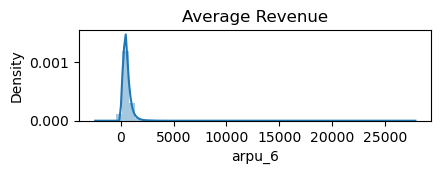

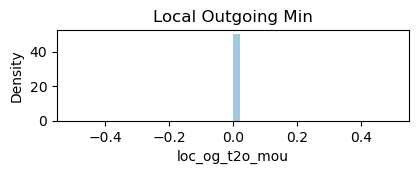

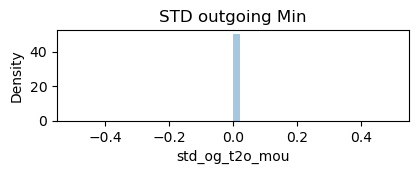

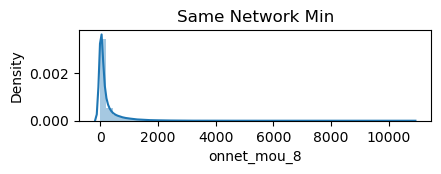

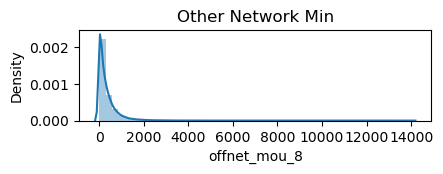

In [259]:
#cross verify these outliers using box plot
plt.figure(figsize=[10,4])
plt.subplot(3,2,1)
sns.distplot(highprofile.arpu_6)
plt.title("Average Revenue")
plt.show()
plt.figure(figsize=[10,4])
plt.subplot(3,2,2)
sns.distplot(highprofile.loc_og_t2o_mou)
plt.title("Local Outgoing Min")
plt.show()
plt.figure(figsize=[10,4])
plt.subplot(3,2,3)
sns.distplot(highprofile.std_og_t2o_mou)
plt.title("STD outgoing Min")
plt.show()
plt.figure(figsize=[10,4])
plt.subplot(3,2,4)
sns.distplot(highprofile.onnet_mou_8)
plt.title("Same Network Min")
plt.show()
plt.figure(figsize=[10,4])
plt.subplot(3,2,4)
sns.distplot(highprofile.offnet_mou_8)
plt.title("Other Network Min")
plt.show()

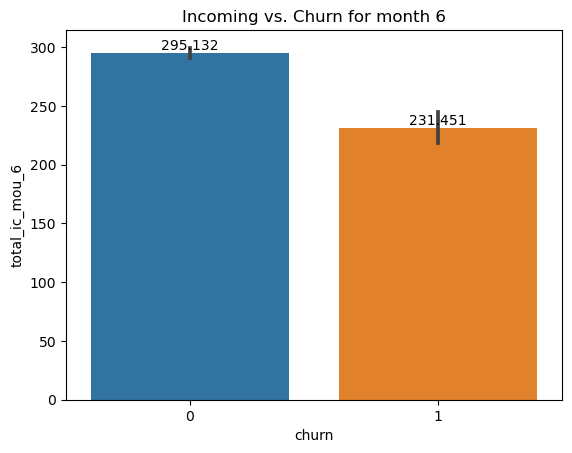

<Figure size 200x400 with 0 Axes>

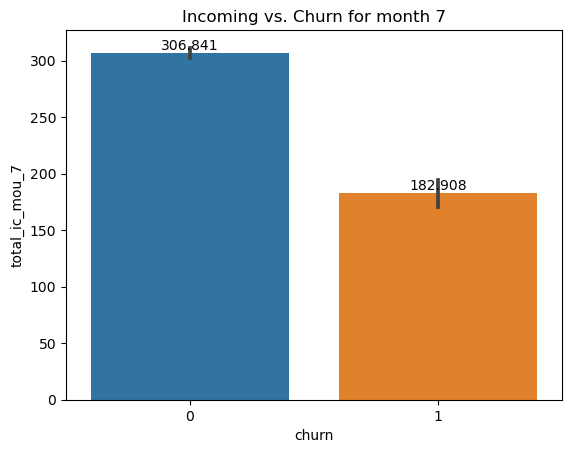

<Figure size 200x400 with 0 Axes>

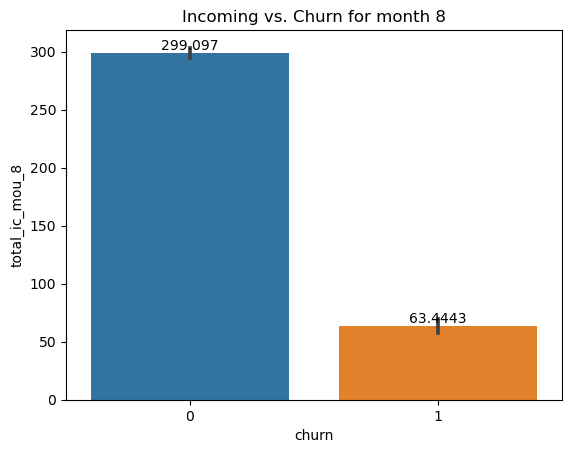

<Figure size 200x400 with 0 Axes>

In [260]:
#incoming min vs churn
for month in [6,7,8]:
    plt.title('Incoming vs. Churn for month %d' %month)
    ax=sns.barplot(x='churn', y='total_ic_mou_'+str(month), data=highprofile)
    ax.bar_label(ax.containers[0], fontsize=10)
    plt.figure(figsize=[2,4])
    plt.show()

Here we see a decreasing trend of Incoming Minutes Over Calls for Churned users.With a striking drop from 182 minutes to 63 minutes going from Month 7 to Month 8(Almost three times reduced)

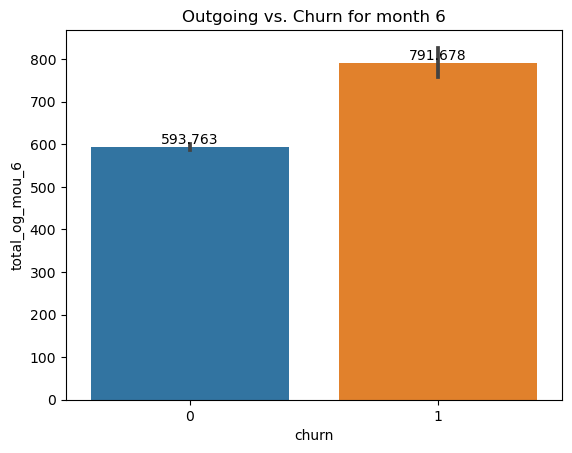

<Figure size 200x400 with 0 Axes>

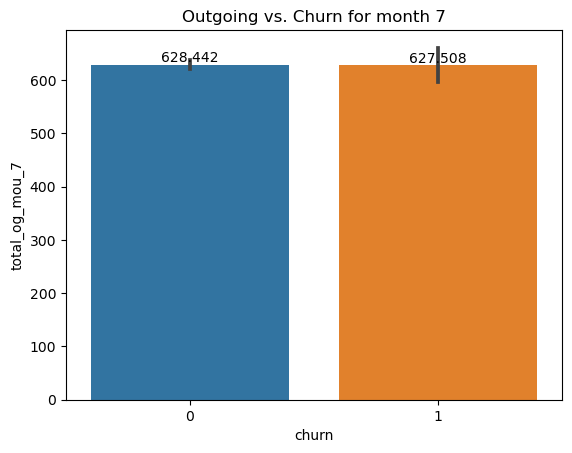

<Figure size 200x400 with 0 Axes>

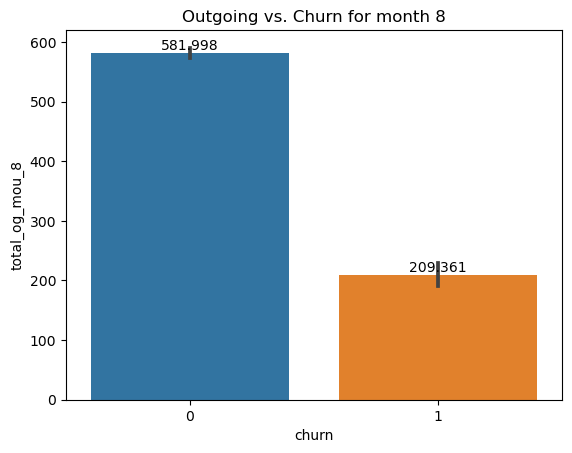

<Figure size 200x400 with 0 Axes>

In [261]:
#outgoing min vs churn
for month in [6,7,8]:
    plt.title('Outgoing vs. Churn for month %d' %month)
    ax=sns.barplot(x='churn', y='total_og_mou_'+str(month), data=highprofile)
    ax.bar_label(ax.containers[0], fontsize=10)
    plt.figure(figsize=[2,4])
    plt.show()

Same trend has been observed for Outgoing Minutes over call with a decrease from 627 minutes to 209 minutes going
from 7 to 8

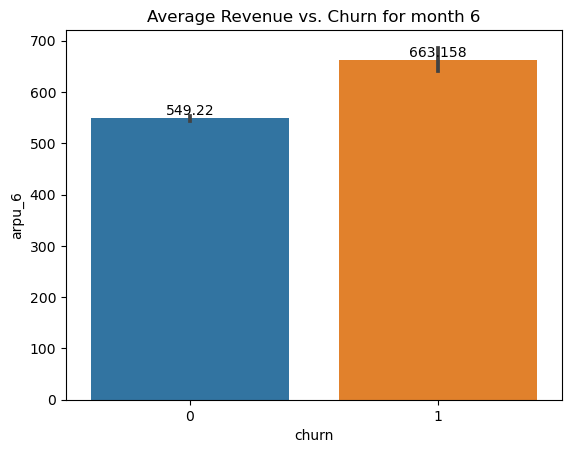

<Figure size 200x400 with 0 Axes>

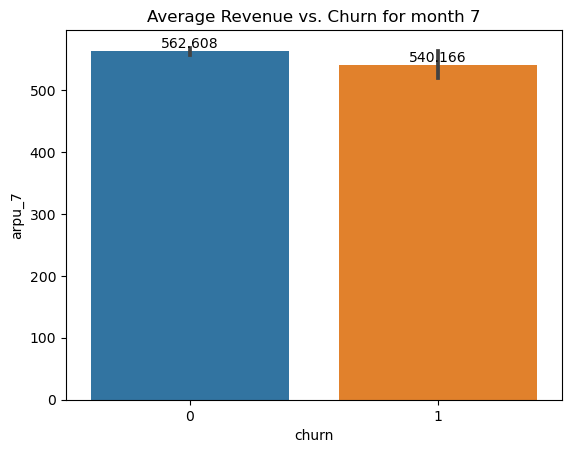

<Figure size 200x400 with 0 Axes>

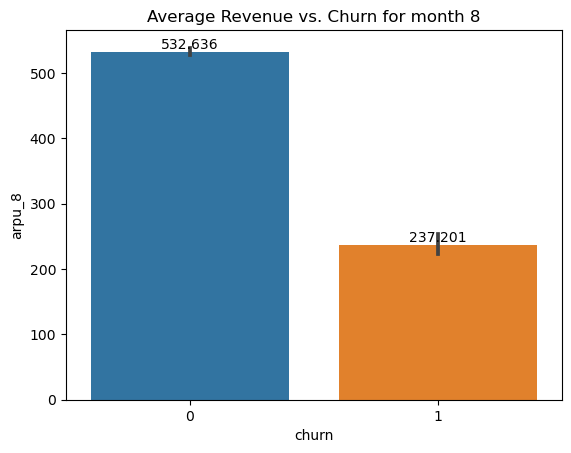

<Figure size 200x400 with 0 Axes>

In [262]:
#Average Revenue min vs churn
for month in [6,7,8]:
    plt.title('Average Revenue vs. Churn for month %d' %month)
    ax=sns.barplot(x='churn', y='arpu_'+str(month), data=highprofile)
    ax.bar_label(ax.containers[0], fontsize=10)
    plt.figure(figsize=[2,4])
    plt.show()

The Average Revenue per user dropped from 540 to 237 which is almost 50% drop

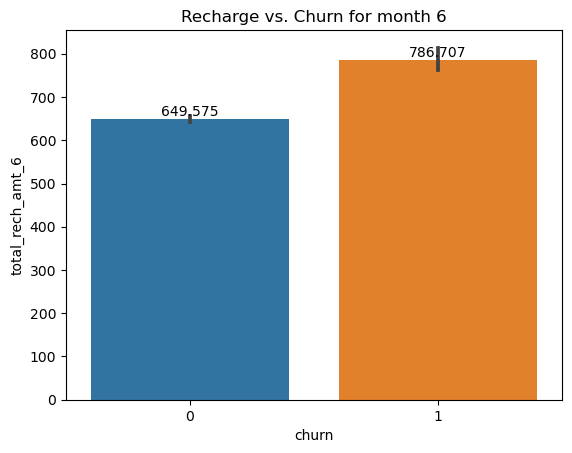

<Figure size 200x400 with 0 Axes>

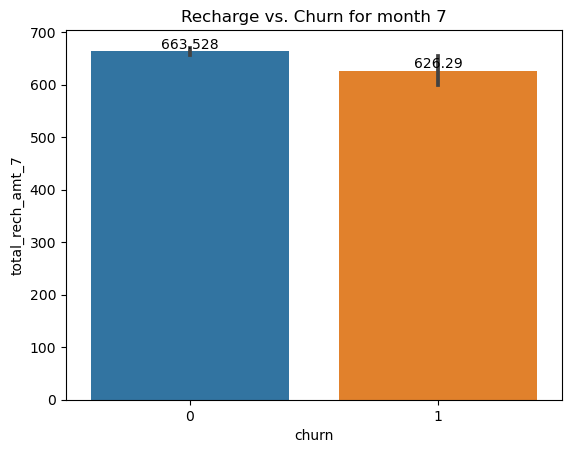

<Figure size 200x400 with 0 Axes>

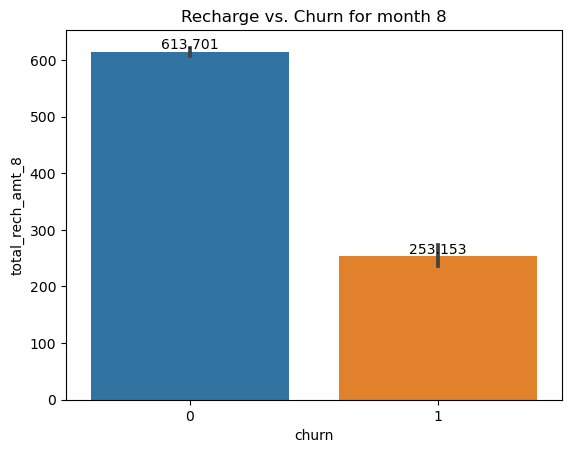

<Figure size 200x400 with 0 Axes>

In [263]:
#Recharge min vs churn
for month in [6,7,8]:
    plt.title('Recharge vs. Churn for month %d' %month)
    ax=sns.barplot(x='churn', y='total_rech_amt_'+str(month), data=highprofile)
    ax.bar_label(ax.containers[0], fontsize=10)
    plt.figure(figsize=[2,4])
    plt.show()

Recharge is again decreased from 626 to 253 which is almost three times which represents churning

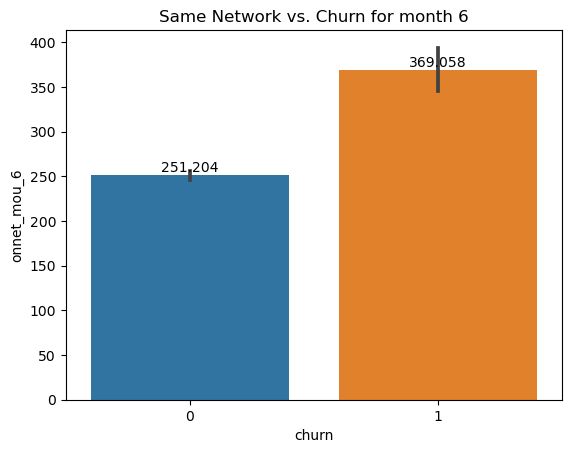

<Figure size 200x400 with 0 Axes>

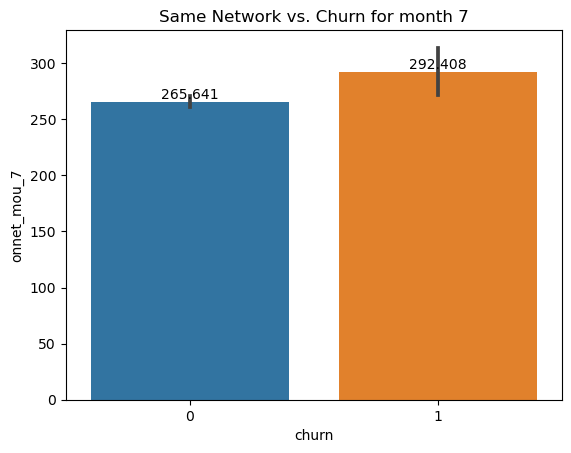

<Figure size 200x400 with 0 Axes>

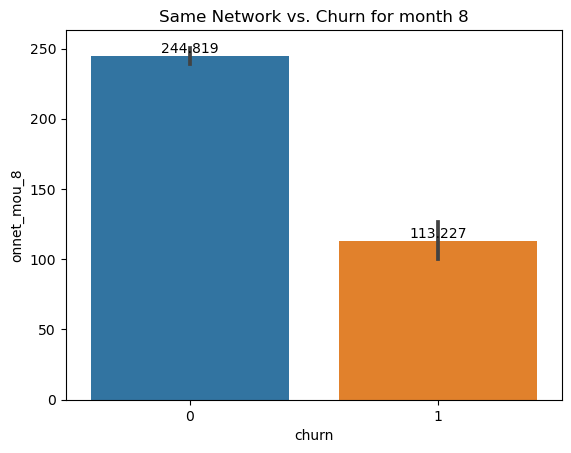

<Figure size 200x400 with 0 Axes>

In [264]:
#Same Network min vs churn
for month in [6,7,8]:
    plt.title('Same Network vs. Churn for month %d' %month)
    ax=sns.barplot(x='churn', y='onnet_mou_'+str(month), data=highprofile)
    ax.bar_label(ax.containers[0], fontsize=10)
    plt.figure(figsize=[2,4])
    plt.show()

The Same Operator/network Calls Drop in month 8 indicates Churn

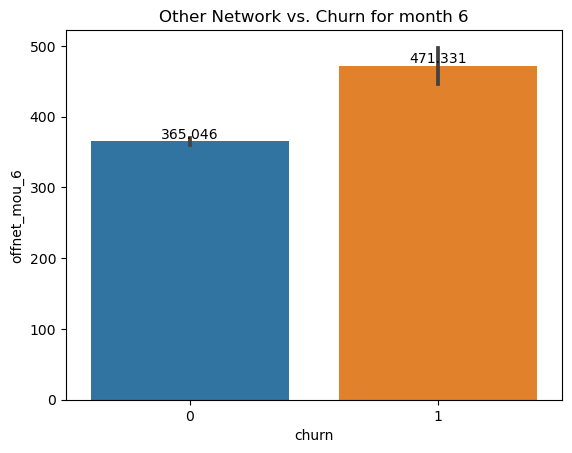

<Figure size 200x400 with 0 Axes>

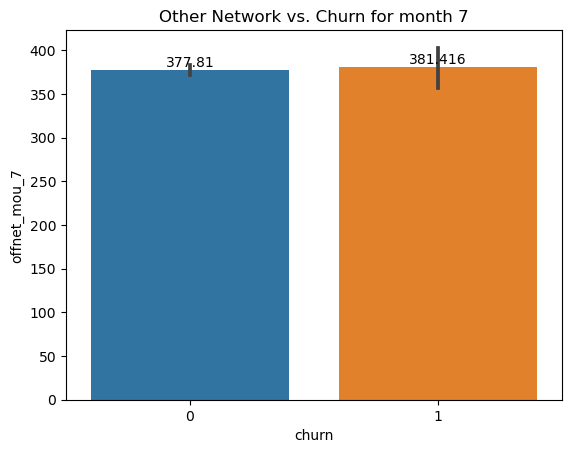

<Figure size 200x400 with 0 Axes>

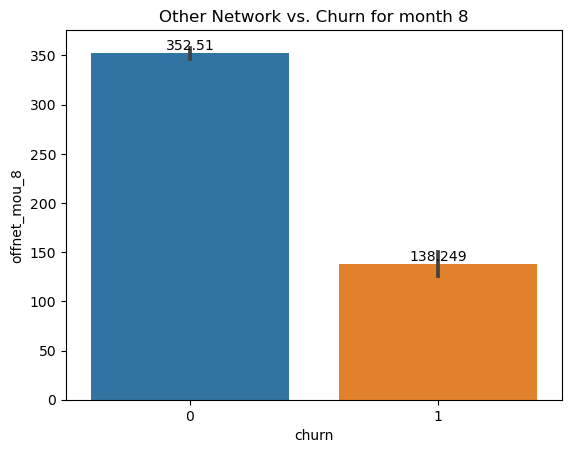

<Figure size 200x400 with 0 Axes>

In [265]:
#Other Network min vs churn
for month in [6,7,8]:
    plt.title('Other Network vs. Churn for month %d' %month)
    ax=sns.barplot(x='churn', y='offnet_mou_'+str(month), data=highprofile)
    ax.bar_label(ax.containers[0], fontsize=10)
    plt.figure(figsize=[2,4])
    plt.show()

The Different operator/network Calls Drop in month 8 indicates Churn

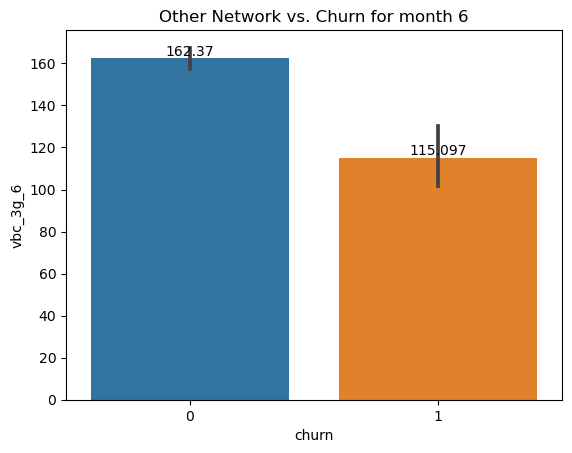

<Figure size 200x400 with 0 Axes>

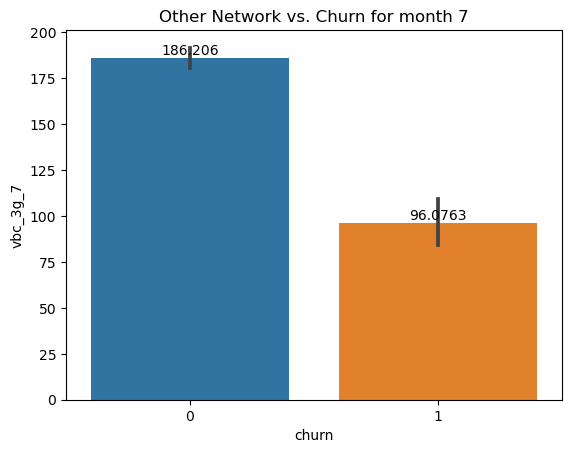

<Figure size 200x400 with 0 Axes>

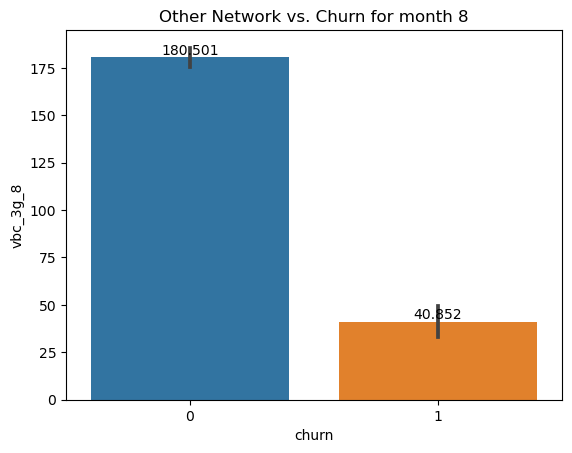

<Figure size 200x400 with 0 Axes>

In [266]:
#Other Network min vs churn
for month in [6,7,8]:
    plt.title('Other Network vs. Churn for month %d' %month)
    ax=sns.barplot(x='churn', y='vbc_3g_'+str(month), data=highprofile)
    ax.bar_label(ax.containers[0], fontsize=10)
    plt.figure(figsize=[2,4])
    plt.show()

Drop in Volume based cost indicating Churn moving from month 7 to 8

#### Correlation

In [267]:
#correlation of recharge amount columns
Cols_corr = ['total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 
            'total_rech_amt_6', 'total_rech_amt_7', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8',
            'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8','onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8']

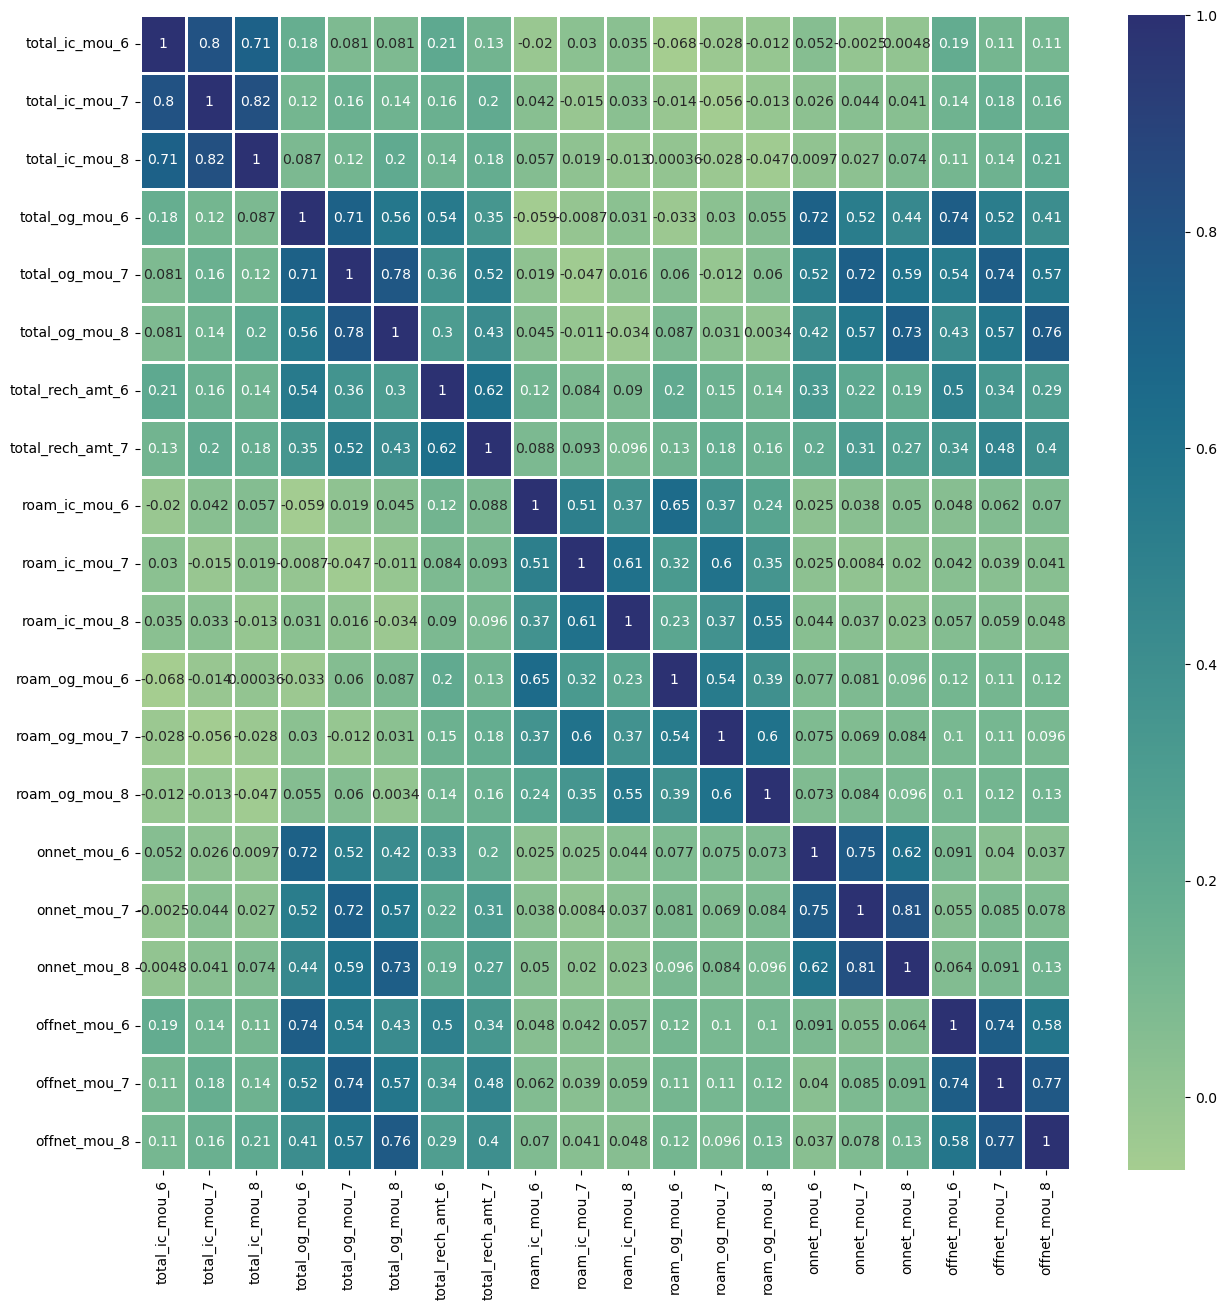

In [268]:

plt.figure(figsize=(15,15))
sns.heatmap(highprofile[Cols_corr].corr(), cmap='crest', annot=True, linecolor='white', linewidths=0.8)
plt.show()

Total incoming mou for month 7 and 8 are highly correlated
Total incoming mou for month 6 and 7 are highly correlated
Also there is high correlation between Total outgoing mou for Total outgoing mou for month 6 and 7
High Correlation between same network calls for month 7 and 8
High Correlation between outside network calls for month 7 and 8

In [269]:
#correlation of data columns
cols_corr_g = ['vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8', 'vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8',
            'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 
             'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8']

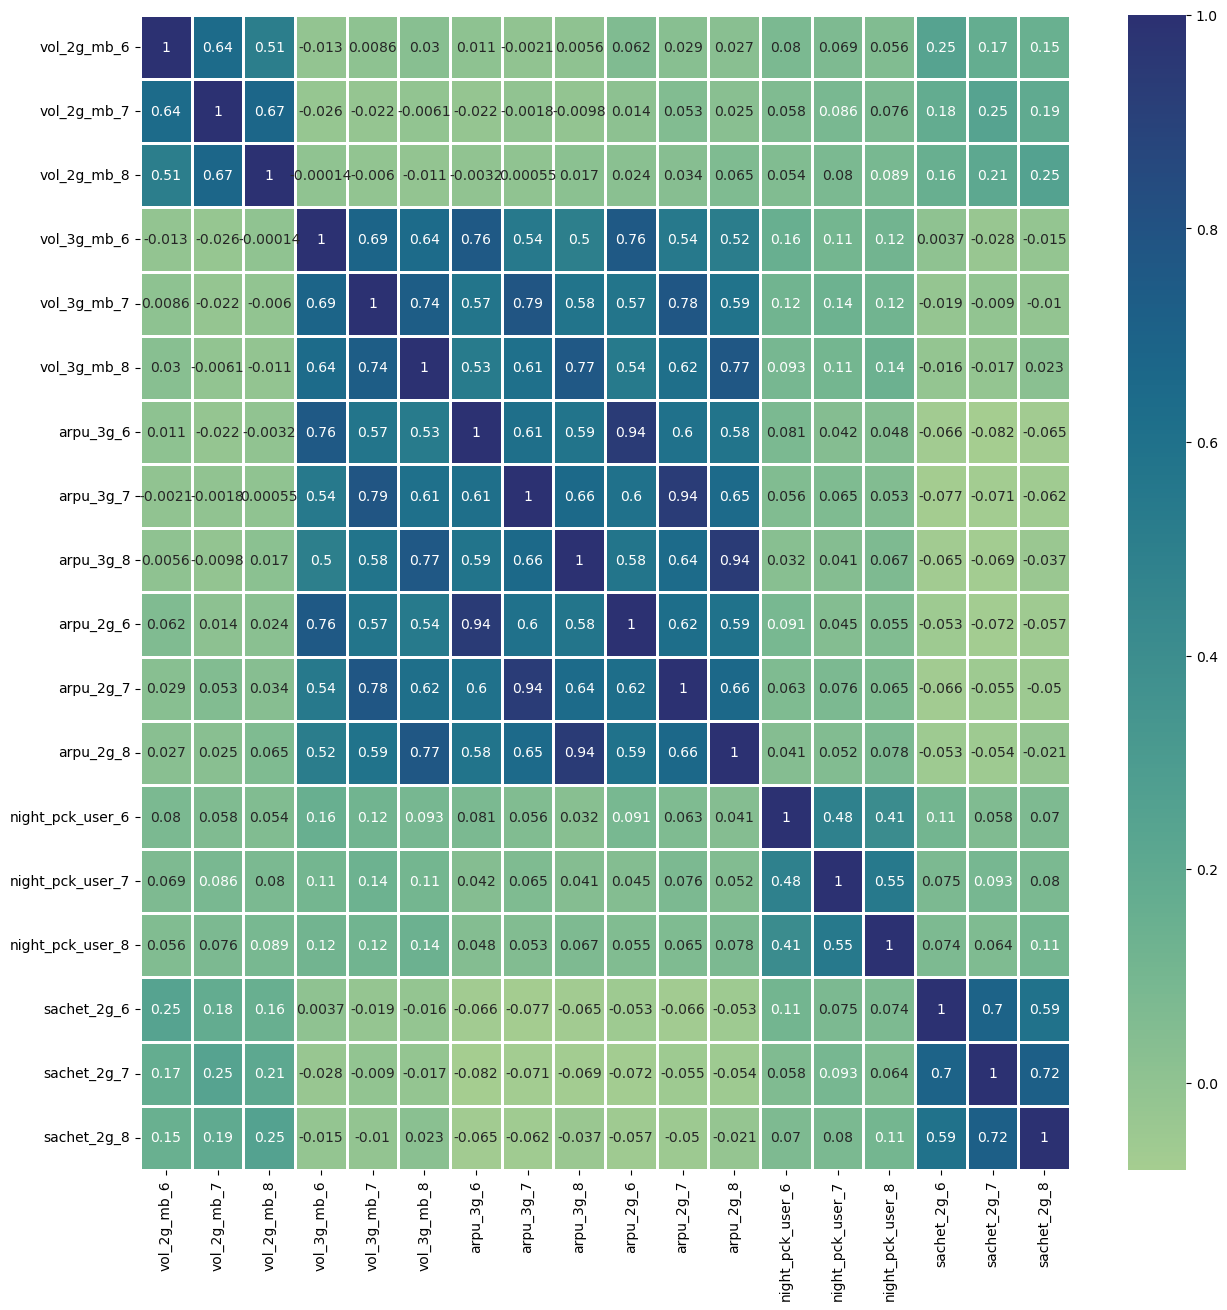

In [270]:

plt.figure(figsize=(15,15))
sns.heatmap(highprofile[cols_corr_g].corr(), cmap='crest', annot=True, linecolor='white', linewidths=0.8)
plt.show()

Here we can see high correlation between variables ARPU 2g and ARPU 3g for months 6 7 and 8

In [271]:
#check the shape
highprofile.shape

(30001, 172)

In [272]:
#dropping date columns
drop_date_columns = ['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
                    'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
                    'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8']

highprofile.drop(drop_date_columns, axis=1, inplace=True)

highprofile.shape

(30001, 163)

In [273]:
highprofile.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6
count,3.000100e+04,30001.0,30001.0,30001.0,30001.0,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.0,30001.0,30001.0,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.00000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.0,30001.0,30001.0,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,

In [274]:
highprofile.shape

(30001, 163)

In [275]:
#feature engineering
highprofile['av_ic_mou'] = (highprofile['total_ic_mou_6'] + highprofile['total_ic_mou_7'] + highprofile['total_ic_mou_8'])/3

highprofile['av_og_mou'] = (highprofile['total_og_mou_6'] + highprofile['total_og_mou_7'] + highprofile['total_og_mou_8'])/3

highprofile['av_recharge_amount'] = (highprofile['total_rech_amt_6'] + highprofile['total_rech_amt_7'])/2

highprofile['av_roam_ic_mou'] = (highprofile['roam_ic_mou_6'] + highprofile['roam_ic_mou_7'] + highprofile['roam_ic_mou_8'])/3

highprofile['av_roam_og_mou'] = (highprofile['roam_og_mou_6'] + highprofile['roam_og_mou_7'] + highprofile['roam_og_mou_8'])/3

highprofile['av_onnet_mou'] = (highprofile['onnet_mou_6'] + highprofile['onnet_mou_7'] + highprofile['onnet_mou_8'])/3

highprofile['av_offnet_mou'] = (highprofile['offnet_mou_6'] + highprofile['offnet_mou_7'] + highprofile['offnet_mou_8'])/3

highprofile['av_vol_2g_mb'] = (highprofile['vol_2g_mb_6'] + highprofile['vol_2g_mb_7'] + highprofile['vol_2g_mb_8'])/3

highprofile['av_night_pck_user'] = (highprofile['night_pck_user_6'] + highprofile['night_pck_user_7'] + highprofile['night_pck_user_8'])/3

highprofile['av_sachet_2g'] = (highprofile['sachet_2g_6'] + highprofile['sachet_2g_7'] + highprofile['sachet_2g_8'])/3

highprofile['av_vol_3g_mb'] = (highprofile['vol_3g_mb_6'] + highprofile['vol_3g_mb_7'] + highprofile['vol_3g_mb_8'])/3

In [276]:
# Drop all columns where mean is 0
highprofile.drop(["loc_og_t2o_mou","std_og_t2o_mou","loc_ic_t2o_mou","std_og_t2c_mou_6","std_og_t2c_mou_7","std_og_t2c_mou_8",
                 "std_ic_t2o_mou_6","std_ic_t2o_mou_7","std_ic_t2o_mou_8"], axis=1, inplace=True)

In [277]:
highprofile.drop(['total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8',
               'total_rech_amt_6', 'total_rech_amt_7', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8',
               'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
               'offnet_mou_7', 'offnet_mou_8', 'vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8', 'night_pck_user_6', 'night_pck_user_7',
               'night_pck_user_8', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8', 'arpu_3g_6', 
                'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8'], axis=1, inplace=True)

In [278]:
highprofile.shape

(30001, 127)

In [280]:
#drop columns with 40% missing values
drop_cols=highprofile.isnull().sum()/highprofile.shape[0]*100>40

In [281]:
#drop columns with null percentage >40
perc = 40.0
count_pr =  ((100-perc)/100)*highprofile.shape[0] + 1
highprofile = highprofile.dropna( axis=1, thresh=count_pr)
highprofile.shape

(30001, 127)

In [283]:
highprofile.describe()

,mobile_number,circle_id,arpu_6,arpu_7,arpu_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,av_ic_mou,av_og_mou,av_recharge_amount,av_roam_ic_mou,av_roam_og_mou,av_onnet_mou,av_offnet_mou,av_vol_2g_mb,av_night_pck_user,av_sachet_2g,av_vol_3g_mb
count,3.000100e+04,30001.0,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.00000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000
mean,7.001206e+09,109.0,558.490824,560.782203,508.597957,84.484753,85.674287,78.077112,163.243297,163.009963,151.756812,6.344115,6.423683,5.886385,1.575104,1.889875,1.707746,254.080388,255.116292,235.728174,165.885296,174.233972,148.441175,179.433389,187.920768,157.350068,1.803548,1.826051,1.584734,347.125955,363.984508,307.379315,2.171525,2.105743,1.948970,5.818270,7.108646,6.557204,0.661092,0.042905,0.057607,65.453285,66.636931,62.619432,150.412393,151.62521,146.232731,15.278467,16.035566,14.403175,231.153776

In [286]:
highprofile.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Data columns (total 127 columns):
 #    Column              Dtype   
---   ------              -----   
 0    mobile_number       int64   
 1    circle_id           int64   
 2    arpu_6              float64 
 3    arpu_7              float64 
 4    arpu_8              float64 
 5    loc_og_t2t_mou_6    float64 
 6    loc_og_t2t_mou_7    float64 
 7    loc_og_t2t_mou_8    float64 
 8    loc_og_t2m_mou_6    float64 
 9    loc_og_t2m_mou_7    float64 
 10   loc_og_t2m_mou_8    float64 
 11   loc_og_t2f_mou_6    float64 
 12   loc_og_t2f_mou_7    float64 
 13   loc_og_t2f_mou_8    float64 
 14   loc_og_t2c_mou_6    float64 
 15   loc_og_t2c_mou_7    float64 
 16   loc_og_t2c_mou_8    float64 
 17   loc_og_mou_6        float64 
 18   loc_og_mou_7        float64 
 19   loc_og_mou_8        float64 
 20   std_og_t2t_mou_6    float64 
 21   std_og_t2t_mou_7    float64 
 22   std_og_t2t_mou_8    float64 
 23   std_og_t2

In [187]:
# Dropping columns with only 1 unique value
cols = []
for i in highprofile.columns:
    if highprofile[i].nunique() ==1:
        cols.append(i)
        
cols

highprofile = highprofile.drop(cols,1)
highprofile.shape

(30001, 113)

In [290]:
# Dropping columns with only 1 unique value
cols = []
for i in highprofile.columns:
    if highprofile[i].nunique() ==1:
        cols.append(i)
        
cols

highprofile = highprofile.drop(cols,1)
highprofile.shape

(30001, 126)

In [291]:
# import required libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from imblearn.metrics import sensitivity_specificity_support
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

In [292]:
std_scaler = StandardScaler()

In [293]:
# create X dataset for model building.
X = highprofile.drop(['churn'],axis=1)

In [294]:
X.head()


,mobile_number,arpu_6,arpu_7,arpu_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,av_ic_mou,av_og_mou,av_recharge_amount,av_roam_ic_mou,av_roam_og_mou,av_onnet_mou,av_offnet_mou,av_vol_2g_mb,av_night_pck_user,av_sachet_2g,av_vol_3g_mb
0,7000842753,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.16,0.00,0.00,4.13,0.00,0.00,1.15,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,252,252,252,252,252,252,252,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.40,0.00,101.20,1.813333,0.000000,307.0,0.00,0.000000,0.000000,0.000000,12.400000,0.0,0.000000,114.646667
7,7000701601,1069.180,1349.850,3171.480,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,3638,1580,790,1580,0,0,779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,802,57.74,19.38,18.74,537.746667,482.310000,1185.0,27.12,24.796667,54.936667,448.833333,0.000000,0.0,0.000000,0.000000
8,7001524846,378.721,492.223,137.362,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.0,0.0,10.23,0.0,0.0,0.0,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,120,90,154,30,50,0,10,0.0,2.0,3.0,0.0,154.0,23.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,177.0,69.0,0,1,0,0,0,0,0,0,0,0.0,1.0,1.0,315,21.03,910.65,122.16,49.630000,370.526667,519.0,0.00,0.000000,266.600000,103.923333,118.676667,0.0,1.333333,254.296667
21,7002124215,514.453,597.753,637.760,4.48,6.16,23.34,91.81,87.93,104.81,0.75,0.00,1.58,0.0,0.0,0.00,97.04,94.09,129.74,97.93,125.94,61.79,665.36,808.74,876.99,0.00,0.00,0.00,763.29,934.69,938.79,0.0

In [295]:
# lets create y dataset for model building.
y=highprofile['churn']
y.head()

0     1
7     1
8     0
21    0
23    0
Name: churn, dtype: category
Categories (2, int64): [0, 1]

In [296]:
# split the dateset into train and test datasets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)
print("Dimension of X_train:", X_train.shape)
print("Dimension of X_test:", X_test.shape)

Dimension of X_train: (21000, 125)
Dimension of X_test: (9001, 125)


In [297]:
num_col = X_train.select_dtypes(include = ['int64','float64']).columns.tolist()

In [298]:
# apply scaling on the dataset
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train[num_col] = scaler.fit_transform(X_train[num_col])

In [299]:
X_train.head()

,mobile_number,arpu_6,arpu_7,arpu_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,av_ic_mou,av_og_mou,av_recharge_amount,av_roam_ic_mou,av_roam_og_mou,av_onnet_mou,av_offnet_mou,av_vol_2g_mb,av_night_pck_user,av_sachet_2g,av_vol_3g_mb
15709,0.606402,0.176515,0.117809,0.038904,0.000269,0.000585,0.000238,0.007005,0.006330,0.015246,0.003075,0.000000,0.000980,0.000000,0.010426,0.006708,0.003471,0.004240,0.005214,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.006292,0.002472,0.000000,0.0,0.0,0.004415,0.005650,0.012348,0.014898,0.012389,0.018297,0.001078,0.003333,0.000000,0.013386,0.014004,0.024154,0.000000,0.000000,0.000000,0.001320,0.000000,0.000000,0.0,0.00000,0.0,0.001119,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.009772,0.050725,0.015306,0.018143,0.038404,0.038404,0.034615,0.038404,0.038404,0.034615,0.016393,0.055556,0.017544,0.099035,0.099035,0.099035,0.023810,0.062500,0.029412,0.0,0.000000,0.000000,0.020408,0.046735,0.037922,0.25,0.25,0.2,0.0,0.000000,0.0000,0.0,0.000000,0.0,1.0,1.0,1.0,0.564115,0.000000,0.000000,0.0,0.015388,0.004194,0.012880,0.000000,0.000000,0.000404,0.004237,0.017555,0.0,0.020833,0.000000
28202,0.774973,0.183226,0.121517,0.032921,0.000566,0.000000,0.000000,0.002533,0.000000,0.000000,0.002454,0.000000,0.000000,0.000000,0.000000,0.000000,0.001624,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.013088,0.007020,0.003657,0.041620,0.021697,0.014587,0.013215,0.008694,0.000000,0.040335,0.022862,0.014662,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00209,0.0,0.000000,0.000316,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.055375,0.108696,0.040816,0.009214,0.009227,0.009227,0.008316,0.009227,0.005985,0.005619,0.114754,0.111111,0.105263,0.016077,0.016077,0.016077,0.166667,0.083333,0.176471,0.0,0.057143,0.000000,0.014445,0.031844,0.034967,0.00,0.00,0.0,0.0,0.000000,0.0000,0.0,0.057143,0.0,1.0,1.0,1.0,0.276745,0.000000,0.000000,0.0,0.024954,0.000531,0.016880,0.000000,0.000000,0.000171,0.000452,0.054605,0.0,0.177083,0.000147
14943,0.375343,0.179991,0.128244,0.033826,0.001004,0.000303,0.000714,0.006148,0.016108,0.014527,0.000000,0.000529,0.000000,0.000000,0.

### Data Imbalance Handling

In [300]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train_sm,y_train_sm = sm.fit_resample(X_train,y_train)

In [301]:
print("Dimension of X_train_sm Shape:", X_train_sm.shape)
print("Dimension of y_train_sm Shape:", y_train_sm.shape)

Dimension of X_train_sm Shape: (38576, 125)
Dimension of y_train_sm Shape: (38576,)


In [303]:
# Importing necessary libraries for Model creation
import statsmodels.api as sm

In [304]:
# Logistic regression model
logm1 = sm.GLM(y_train_sm,(sm.add_constant(X_train_sm)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38576
Model:                            GLM   Df Residuals:                    38457
Model Family:                Binomial   Df Model:                          118
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 13 Nov 2023   Deviance:                       27349.
Time:                        17:46:42   Pearson chi2:                 4.99e+11
No. Iterations:                    12   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.2292      0.514     -2.390      0.017      -2.237      -0.221
mobile_number         -0.0420      0.055     -0.760      0.447      -0.150       0.066
arpu_6                10.7502      1.936      5.552      0.000       6.955      14.545
arpu_7                 9.7474      2.742      3.554      0.000       4.372      15.122
arpu_8                12.8704      2.629      4.895      0.000       7.717      18.024
loc_og_t2t_mou_6    1.063e+04   2.03e+04      0.524      0.601   -2.92e+04    5.04e+04
loc_og_t2t_mou_7   -3.755e+04   2.33e+04     -1.612      0.107   -8.32e+04    8093.933
loc_og_t2t_mou_8    2.909e+05   3.56e+04      8.162      0.000    2.21e+05    3.61e+05
loc_og_t2m_mou_6    7819.7379   1.49e+04      0.523      0.601   -2.15e+04    3.71e+04
loc_og_t2m_mou_7   -2.262e+04    1.4e+04     -1.613      0.107   -5.01e+04    4872.230
loc_og_t2m_mou_8    9.595e+04   1.18e+04      8.162      0.000    7.29e+04    1.19e+05
loc_og_t2f_mou_6    1120.2523   2136.696      0.524      0.600   -3067.595    5308.100
loc_og_t2f_mou_7   -5381.3272   3329.476     -1.616      0.106   -1.19e+04    1144.325
loc_og_t2f_mou_8    2.512e+04   3077.391      8.164      0.000    1.91e+04    3.12e+04
loc_og_t2c_mou_6      -4.9948      1.026     -4.867      0.000      -7.006      -2.983
loc_og_t2c_mou_7       1.7288      1.757      0.984      0.325      -1.715       5.173
loc_og_t2c_mou_8       1.1068      1.232      0.898      0.369      -1.308       3.521
loc_og_mou_6        1.704e+04   3.71e+04      0.460      0.646   -5.56e+04    8.97e+04
loc_og_mou_7        6.393e+04   2.67e+04      2.391      0.017    1.15e+04    1.16e+05
loc_og_mou_8       -2.627e+05   4.03e+04     -6.518      0.000   -3.42e+05   -1.84e+05
std_og_t2t_mou_6   -3.363e+04   2.89e+04     -1.164      0.244   -9.03e+04     2.3e+04
std_og_t2t_mou_7   -6.652e+04   3.28e+04     -2.025      0.043   -1.31e+05   -2138.691
std_og_t2t_mou_8     2.09e+05   3.55e+04      5.888      0.000    1.39e+05    2.79e+05
std_og_t2m_mou_6   -3.796e+04   3.26e+04     -1.164      0.244   -1.02e+05     2.6e+04
std_og_t2m_mou_7   -7.592e+04   3.75e+04     -2.025      0.043   -1.49e+05   -2435.756
std_og_t2m_mou_8    3.638e+05   6.18e+04      5.888      0.000    2.43e+05    4.85e+05
std_og_t2f_mou_6   -2870.0943   2465.523     -1.164      0.244   -7702.431    1962.243
std_og_t2f_mou_7   -4453.3975   2199.478     -2.025      0.043   -8764.295    -142.500
std_og_t2f_mou_8    1.347e+04   2289.941      5.884      0.000    8985.606     1.8e+04
std_og_mou_6        6.595e+04   3.56e+04      1.850      0.064   -3919.646    1.36e+05
std_og_mou_7         1.25e+05   4.75e+04      2.634      0.008     3.2e+04    2.18e+05
std_og_mou_8       -3.191e+05   6.52e+04     -4.898      0.000   -4.47e+05   -1.91e+05
isd_og_mou_6        4750.4142   2093.3

In [307]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE

# running RFE with 20 variables as output
rfe = RFE(logreg, n_features_to_select=20,step=1)             
rfe = rfe.fit(X_train_sm, y_train_sm)

In [308]:
rfe.support_

array([False,  True,  True, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False,  True, False,  True,
        True, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False,  True, False, False, False, False, False,
       False, False, False,  True,  True, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False,  True, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False,  True,
        True, False, False, False, False, False, False, False])

In [309]:
rfe_columns=X_train_sm.columns[rfe.support_]
print("The selected columns by RFE for modelling are: \n\n",rfe_columns)

The selected columns by RFE for modelling are: 

 Index(['arpu_6', 'arpu_7', 'loc_og_t2m_mou_8', 'loc_og_mou_8', 'std_og_mou_8',
       'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8',
       'loc_ic_mou_8', 'std_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_8',
       'total_rech_amt_8', 'last_day_rch_amt_8', 'count_rech_2g_8',
       'av_rech_amt_data_8', 'monthly_2g_8', 'vbc_3g_8', 'av_recharge_amount',
       'av_roam_ic_mou'],
      dtype='object')


In [310]:
list(zip(X_train_sm.columns, rfe.support_, rfe.ranking_))

[('mobile_number', False, 102),
 ('arpu_6', True, 1),
 ('arpu_7', True, 1),
 ('arpu_8', False, 5),
 ('loc_og_t2t_mou_6', False, 67),
 ('loc_og_t2t_mou_7', False, 101),
 ('loc_og_t2t_mou_8', False, 7),
 ('loc_og_t2m_mou_6', False, 68),
 ('loc_og_t2m_mou_7', False, 27),
 ('loc_og_t2m_mou_8', True, 1),
 ('loc_og_t2f_mou_6', False, 65),
 ('loc_og_t2f_mou_7', False, 9),
 ('loc_og_t2f_mou_8', False, 17),
 ('loc_og_t2c_mou_6', False, 23),
 ('loc_og_t2c_mou_7', False, 104),
 ('loc_og_t2c_mou_8', False, 96),
 ('loc_og_mou_6', False, 41),
 ('loc_og_mou_7', False, 50),
 ('loc_og_mou_8', True, 1),
 ('std_og_t2t_mou_6', False, 73),
 ('std_og_t2t_mou_7', False, 46),
 ('std_og_t2t_mou_8', False, 21),
 ('std_og_t2m_mou_6', False, 75),
 ('std_og_t2m_mou_7', False, 43),
 ('std_og_t2m_mou_8', False, 15),
 ('std_og_t2f_mou_6', False, 82),
 ('std_og_t2f_mou_7', False, 34),
 ('std_og_t2f_mou_8', False, 4),
 ('std_og_mou_6', False, 39),
 ('std_og_mou_7', False, 13),
 ('std_og_mou_8', True, 1),
 ('isd_og_mou_

In [311]:
#model it
X_train_SM = sm.add_constant(X_train_sm[rfe_columns])
logm2 = sm.GLM(y_train_sm,X_train_SM, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38576
Model:                            GLM   Df Residuals:                    38555
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14813.
Date:                Mon, 13 Nov 2023   Deviance:                       29626.
Time:                        17:56:10   Pearson chi2:                 1.88e+15
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4611
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -2.5204      0.437     -5.769      0.000      -3.377      -1.664
arpu_6                 9.8109      1.435      6.839      0.000       6.999      12.623
arpu_7                21.2396      2.198      9.663      0.000      16.932      25.548
loc_og_t2m_mou_8      -5.3198      1.258     -4.228      0.000      -7.786      -2.853
loc_og_mou_8         -21.4214      2.683     -7.985      0.000     -26.680     -16.163
std_og_mou_8          -8.2265      0.606    -13.576      0.000      -9.414      -7.039
loc_ic_t2t_mou_8      20.9210      5.507      3.799      0.000      10.127      31.715
loc_ic_t2m_mou_7      15.9552      0.919     17.356      0.000      14.153      17.757
loc_ic_t2m_mou_8       1.7759      6.067      0.293      0.770     -10.115      13.667
loc_ic_mou_8         -58.5594      6.799     -8.612      0.000     -71.886     -45.233
std_ic_mou_8         -17.4077      1.569    -11.093      0.000     -20.483     -14.332
spl_ic_mou_8         -30.3820      1.869    -16.258      0.000     -34.045     -26.719
total_rech_num_8     -10.3683      0.605    -17.139      0.000     -11.554      -9.183
total_rech_amt_8      -4.0476      1.004     -4.030      0.000      -6.016      -2.079
last_day_rch_amt_8   -18.9268      0.861    -21.987      0.000     -20.614     -17.240
count_rech_2g_8       -6.6080      0.395    -16.714      0.000      -7.383      -5.833
av_rech_amt_data_8    -9.3268      0.597    -15.623      0.000     -10.497      -8.157
monthly_2g_8          -5.8342      0.351    -16.623      0.000      -6.522      -5.146
vbc_3g_8              -5.8079      0.578    -10.045      0.000      -6.941      -4.675
av_recharge_amount    -3.6284      3.145     -1.154      0.249      -9.793       2.536
av_roam_ic_mou        10.1724      0.846     12.025      0.000       8.514      11.830
======================================================================================
"""

In [312]:
# From the p-value of the individual columns, 
    # we can drop the column 'loc_ic_t2t_mou_8' as it has high p-value of 0.80
rfe_columns_1=rfe_columns.drop('loc_ic_t2t_mou_8',1)
print("\nThe new set of edited featured are:\n",rfe_columns_1)


The new set of edited featured are:
 Index(['arpu_6', 'arpu_7', 'loc_og_t2m_mou_8', 'loc_og_mou_8', 'std_og_mou_8',
       'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_mou_8', 'std_ic_mou_8',
       'spl_ic_mou_8', 'total_rech_num_8', 'total_rech_amt_8',
       'last_day_rch_amt_8', 'count_rech_2g_8', 'av_rech_amt_data_8',
       'monthly_2g_8', 'vbc_3g_8', 'av_recharge_amount', 'av_roam_ic_mou'],
      dtype='object')


In [313]:
# Training the model with the edited feature list
X_train_SM = sm.add_constant(X_train_sm[rfe_columns_1])
logm2 = sm.GLM(y_train_sm,X_train_SM, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38576
Model:                            GLM   Df Residuals:                    38556
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14820.
Date:                Mon, 13 Nov 2023   Deviance:                       29641.
Time:                        17:56:11   Pearson chi2:                 2.12e+15
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4609
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -2.4532      0.431     -5.688      0.000      -3.299      -1.608
arpu_6                 9.6817      1.421      6.813      0.000       6.897      12.467
arpu_7                20.7879      2.165      9.602      0.000      16.545      25.031
loc_og_t2m_mou_8      -5.6892      1.241     -4.586      0.000      -8.121      -3.258
loc_og_mou_8         -20.4868      2.625     -7.805      0.000     -25.632     -15.342
std_og_mou_8          -8.1896      0.604    -13.565      0.000      -9.373      -7.006
loc_ic_t2m_mou_7      15.9068      0.916     17.363      0.000      14.111      17.702
loc_ic_t2m_mou_8     -17.9731      2.954     -6.085      0.000     -23.762     -12.184
loc_ic_mou_8         -34.9364      2.436    -14.343      0.000     -39.710     -30.162
std_ic_mou_8         -17.5744      1.573    -11.175      0.000     -20.657     -14.492
spl_ic_mou_8         -30.3504      1.868    -16.249      0.000     -34.011     -26.690
total_rech_num_8     -10.2691      0.604    -17.012      0.000     -11.452      -9.086
total_rech_amt_8      -3.9189      0.999     -3.923      0.000      -5.877      -1.961
last_day_rch_amt_8   -19.0509      0.860    -22.163      0.000     -20.736     -17.366
count_rech_2g_8       -6.6153      0.395    -16.741      0.000      -7.390      -5.841
av_rech_amt_data_8    -9.3528      0.597    -15.679      0.000     -10.522      -8.184
monthly_2g_8          -5.8524      0.351    -16.669      0.000      -6.541      -5.164
vbc_3g_8              -5.8796      0.578    -10.171      0.000      -7.013      -4.747
av_recharge_amount    -3.1335      3.097     -1.012      0.312      -9.204       2.937
av_roam_ic_mou        10.2236      0.847     12.066      0.000       8.563      11.884
======================================================================================
"""

In [314]:
# From the p-value of the individual columns, 
    # we can drop the column 'loc_ic_t2m_mou_8' as it has high p-value
rfe_columns_2=rfe_columns_1.drop('loc_ic_t2m_mou_8',1)
print("\nThe new set of edited featured are:\n",rfe_columns_2)


The new set of edited featured are:
 Index(['arpu_6', 'arpu_7', 'loc_og_t2m_mou_8', 'loc_og_mou_8', 'std_og_mou_8',
       'loc_ic_t2m_mou_7', 'loc_ic_mou_8', 'std_ic_mou_8', 'spl_ic_mou_8',
       'total_rech_num_8', 'total_rech_amt_8', 'last_day_rch_amt_8',
       'count_rech_2g_8', 'av_rech_amt_data_8', 'monthly_2g_8', 'vbc_3g_8',
       'av_recharge_amount', 'av_roam_ic_mou'],
      dtype='object')


In [315]:
# Training the model with the edited feature list
X_train_SM = sm.add_constant(X_train_sm[rfe_columns_2])
logm2 = sm.GLM(y_train_sm,X_train_SM, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38576
Model:                            GLM   Df Residuals:                    38557
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14839.
Date:                Mon, 13 Nov 2023   Deviance:                       29677.
Time:                        17:56:32   Pearson chi2:                 2.47e+15
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4604
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -2.5472      0.427     -5.965      0.000      -3.384      -1.710
arpu_6                 9.8570      1.409      6.995      0.000       7.095      12.619
arpu_7                21.4161      2.144      9.987      0.000      17.213      25.619
loc_og_t2m_mou_8      -7.7698      1.145     -6.785      0.000     -10.014      -5.525
loc_og_mou_8         -17.2194      2.395     -7.190      0.000     -21.913     -12.526
std_og_mou_8          -8.3209      0.603    -13.801      0.000      -9.503      -7.139
loc_ic_t2m_mou_7      14.1849      0.846     16.764      0.000      12.526      15.843
loc_ic_mou_8         -47.6972      1.373    -34.732      0.000     -50.389     -45.006
std_ic_mou_8         -17.4435      1.567    -11.131      0.000     -20.515     -14.372
spl_ic_mou_8         -30.4109      1.866    -16.296      0.000     -34.068     -26.753
total_rech_num_8     -10.4692      0.603    -17.354      0.000     -11.652      -9.287
total_rech_amt_8      -3.8222      1.002     -3.815      0.000      -5.786      -1.858
last_day_rch_amt_8   -19.1368      0.860    -22.256      0.000     -20.822     -17.452
count_rech_2g_8       -6.6082      0.395    -16.747      0.000      -7.382      -5.835
av_rech_amt_data_8    -9.4297      0.596    -15.815      0.000     -10.598      -8.261
monthly_2g_8          -5.8075      0.351    -16.560      0.000      -6.495      -5.120
vbc_3g_8              -5.9053      0.577    -10.228      0.000      -7.037      -4.774
av_recharge_amount    -3.2794      3.049     -1.075      0.282      -9.256       2.697
av_roam_ic_mou        10.0921      0.844     11.955      0.000       8.438      11.747
======================================================================================
"""

In [316]:
# Getting the predicted values on the train set
y_train_sm_pred = res.predict(X_train_SM)
y_train_sm_pred = y_train_sm_pred.values.reshape(-1)
y_train_sm_pred[:10]

array([1.07497074e-01, 3.42637166e-01, 3.52510989e-01, 4.10201086e-01,
       5.67195424e-01, 4.35192754e-01, 2.44258570e-07, 2.96742193e-01,
       1.17389800e-02, 6.71621683e-01])

In [317]:
y_train_sm_pred_final = pd.DataFrame({'Converted':y_train_sm.values, 'Converted_prob':y_train_sm_pred})
y_train_sm_pred_final.head()

,Converted,Converted_prob
0,0,0.107497
1,0,0.342637
2,0,0.352511
3,0,0.410201
4,0,0.567195


In [318]:
y_train_sm_pred_final['churn_pred'] = y_train_sm_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Viewing the prediction results
y_train_sm_pred_final.head()

,Converted,Converted_prob,churn_pred
0,0,0.107497,0
1,0,0.342637,0
2,0,0.352511,0
3,0,0.410201,0
4,0,0.567195,1


In [319]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final.churn_pred )
print(confusion)

[[15792  3496]
 [ 2593 16695]]


In [320]:
# Checking the overall accuracy.
print("The overall accuracy of the model is:",metrics.accuracy_score(y_train_sm_pred_final.Converted, y_train_sm_pred_final.churn_pred))

The overall accuracy of the model is: 0.842155744504355


In [321]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [322]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_sm[rfe_columns_2].columns
vif['VIF'] = [variance_inflation_factor(X_train_sm[rfe_columns].values, i) for i in range(X_train_sm[rfe_columns_2].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,spl_ic_mou_8,81.63
1,arpu_7,43.97
7,std_ic_mou_8,43.87
0,arpu_6,40.44
5,loc_ic_t2m_mou_7,18.80
12,count_rech_2g_8,7.51
2,loc_og_t2m_mou_8,4.45
3,loc_og_mou_8,4.15
11,last_day_rch_amt_8,3.75
6,loc_ic_mou_8,3.49


In [323]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [324]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity = ",TP / float(TP+FN))

# Let us calculate specificity
print("Specificity = ",TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False Positive Rate = ",FP/ float(TN+FP))

# positive predictive value 
print ("Precision = ",TP / float(TP+FP))

# Negative predictive value
print ("True Negative Prediction Rate = ",TN / float(TN+ FN))

Sensitivity =  0.8655640812940688
Specificity =  0.8187474077146413
False Positive Rate =  0.18125259228535878
Precision =  0.8268535486107672
True Negative Prediction Rate =  0.8589611096002175


In [325]:
# Defining a function to plot the roc curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Prediction Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [326]:
# Defining the variables to plot the curve
fpr, tpr, thresholds = metrics.roc_curve( y_train_sm_pred_final.Converted, y_train_sm_pred_final.Converted_prob, drop_intermediate = False )

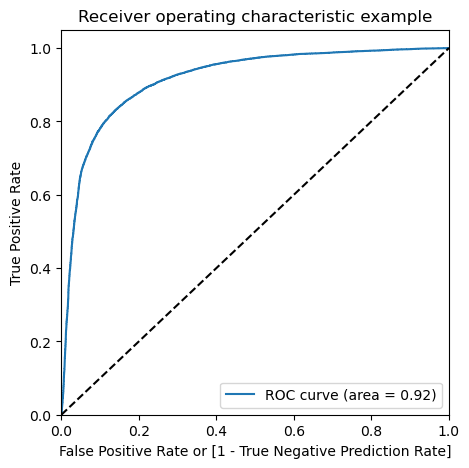

In [327]:
# Plotting the curve for the obtained metrics
draw_roc(y_train_sm_pred_final.Converted, y_train_sm_pred_final.Converted_prob)

In [328]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_sm_pred_final[i]= y_train_sm_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_sm_pred_final.head()

,Converted,Converted_prob,churn_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.107497,0,1,1,0,0,0,0,0,0,0,0
1,0,0.342637,0,1,1,1,1,0,0,0,0,0,0
2,0,0.352511,0,1,1,1,1,0,0,0,0,0,0
3,0,0.410201,0,1,1,1,1,1,0,0,0,0,0
4,0,0.567195,1,1,1,1,1,1,1,0,0,0,0


In [329]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0  0.0          0.500000  1.000000     0.000000   
0.1  0.1          0.717571  0.977862     0.457279   
0.2  0.2          0.773719  0.958523     0.588915   
0.3  0.3          0.807471  0.933223     0.681719   
0.4  0.4          0.830076  0.904189     0.755962   
0.5  0.5          0.842156  0.865564     0.818747   
0.6  0.6          0.845137  0.819370     0.870904   
0.7  0.7          0.834249  0.754407     0.914092   
0.8  0.8          0.803842  0.658233     0.949450   
0.9  0.9          0.629277  0.273590     0.984965   


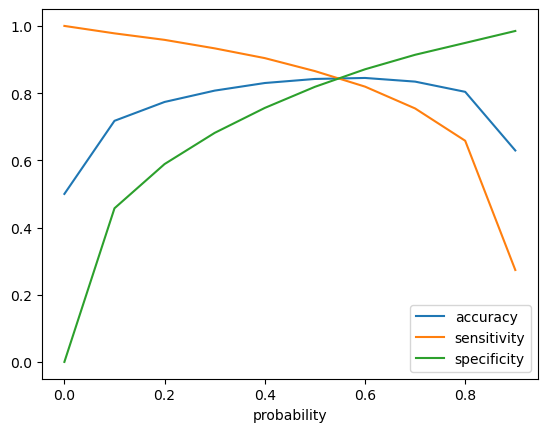

In [330]:
# plotting accuracy sensitivity and specificity for various probabilities calculated above.
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

In [331]:
# Let's create columns with refined probability cutoffs 
numbers = [0.50,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59]
for i in numbers:
    y_train_sm_pred_final[i]= y_train_sm_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_sm_pred_final.head()

,Converted,Converted_prob,churn_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59
0,0,0.107497,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0.342637,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0.352511,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0.410201,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0.567195,1,1,1,1,1,1,1,0,0,0,0,1,1,1,1,1,1,0,0,0


In [332]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.50,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

      probability  accuracy  sensitivity  specificity
0.50  0.50         0.842156  0.865564     0.818747   
0.51  0.51         0.843348  0.861676     0.825021   
0.52  0.52         0.843944  0.857476     0.830413   
0.53  0.53         0.844463  0.852862     0.836064   
0.54  0.54         0.844489  0.847885     0.841093   
0.55  0.55         0.844878  0.843685     0.846070   
0.56  0.56         0.845344  0.838864     0.851825   
0.57  0.57         0.845396  0.834146     0.856647   
0.58  0.58         0.845500  0.829220     0.861779   
0.59  0.59         0.845370  0.824762     0.865979   


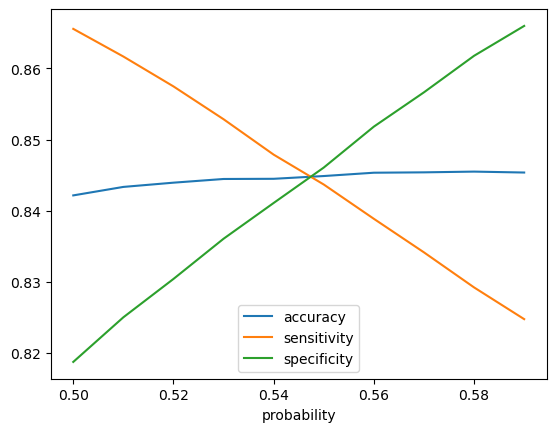

In [333]:
# plotting accuracy sensitivity and specificity for various probabilities calculated above.
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

In [334]:
#### From the curve above, 0.2 is the optimum point to take it as a cutoff probability.

y_train_sm_pred_final['final_churn_pred'] = y_train_sm_pred_final.Converted_prob.map( lambda x: 1 if x > 0.54 else 0)

y_train_sm_pred_final.head()

,Converted,Converted_prob,churn_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59,final_churn_pred
0,0,0.107497,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0.342637,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0.352511,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0.410201,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0.567195,1,1,1,1,1,1,1,0,0,0,0,1,1,1,1,1,1,0,0,0,1


In [335]:
# Calculating the ovearall accuracy again
print("The overall accuracy of the model now is:",metrics.accuracy_score(y_train_sm_pred_final.Converted, y_train_sm_pred_final.final_churn_pred))

The overall accuracy of the model now is: 0.8444888013272501


In [336]:
confusion2 = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final.final_churn_pred )
print(confusion2)

[[16223  3065]
 [ 2934 16354]]


In [337]:
TP2 = confusion2[1,1] # true positive 
TN2 = confusion2[0,0] # true negatives
FP2 = confusion2[0,1] # false positives
FN2 = confusion2[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("Sensitivity = ",TP2 / float(TP2+FN2))

# Let us calculate specificity
print("Specificity = ",TN2 / float(TN2+FP2))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False Positive Rate = ",FP2/ float(TN2+FP2))

# positive predictive value 
print ("Precision = ",TP2 / float(TP2+FP2))

# Negative predictive value
print ("True Negative Prediction Rate = ",TN2 / float(TN2 + FN2))

Sensitivity =  0.8478846951472419
Specificity =  0.8410929075072584
False Positive Rate =  0.1589070924927416
Precision =  0.8421648900561306
True Negative Prediction Rate =  0.8468444954846792


In [338]:
from sklearn.metrics import precision_recall_curve

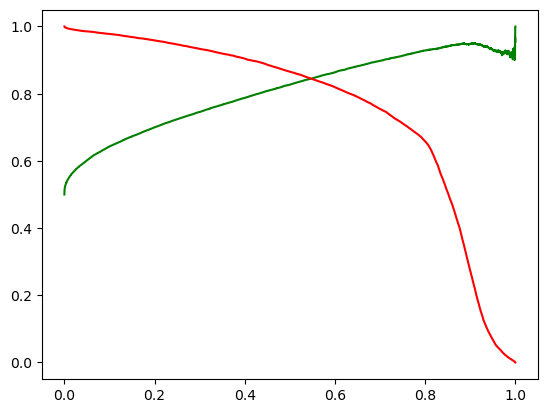

In [339]:
p, r, thresholds = precision_recall_curve(y_train_sm_pred_final.Converted, y_train_sm_pred_final.Converted_prob)

# Plotting the curve
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### ### Making predictions on the test set

In [340]:
# Scaling the test data
X_test[num_col] = scaler.transform(X_test[num_col])
X_test.head()

,mobile_number,arpu_6,arpu_7,arpu_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,av_ic_mou,av_og_mou,av_recharge_amount,av_roam_ic_mou,av_roam_og_mou,av_onnet_mou,av_offnet_mou,av_vol_2g_mb,av_night_pck_user,av_sachet_2g,av_vol_3g_mb
35865,0.050868,0.178491,0.110441,0.026143,0.000249,0.000000,0.000000,0.003565,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.001734,0.000000,0.000000,0.020839,0.000000,0.000094,0.001402,0.000000,0.000000,0.000000,0.000000,0.0,0.019587,0.000000,0.000054,0.0,0.0,0.0,0.000000,0.004941,0.000000,0.000000,0.0,0.0,0.001493,0.001937,0.000162,0.003225,0.002280,0.002466,0.000077,0.000000,0.002178,0.003321,0.003182,0.002782,0.000000,0.000041,0.000023,0.001853,0.000000,0.010098,0.0,0.0,0.0,0.001572,0.000036,0.009587,0.0,0.018753,0.000000,0.000053,0.000000,0.000000,0.0,0.000000,0.0,0.016287,0.050725,0.010204,0.000714,0.022444,0.006234,0.002248,0.004239,0.002494,0.000000,0.016393,0.092593,0.000000,0.010932,0.016077,0.000000,0.02381,0.104167,0.000000,0.000000,0.000000,0.000000,0.002253,0.028637,0.000000,0.00,0.0,0.0,0.000000,0.000000,0.0000,0.000000,0.0,0.0,0.0,1.0,0.0,0.012557,0.000000,0.000000,0.000000,0.005986,0.005837,0.008480,0.000000,0.000000,0.007313,0.001130,0.016970,0.0,0.062500,0.000000
41952,0.623438,0.181306,0.132776,0.048190,0.006489,0.004028,0.002058,0.000516,0.003132,0.005379,0.000000,0.001285,0.000409,0.000000,0.036826,0.0,0.004151,0.005882,0.003767,0.000045,0.001600,0.000000,0.010557,0.019829,0.006146,0.004741,0.018985,0.0,0.010802,0.018971,0.006132,0.0,0.0,0.0,0.000000,0.020936,0.000000,0.000000,0.0,0.0,0.025150,0.049448,0.023064,0.002868,0.011624,0.005979,0.000000,0.000000,0.000000,0.023235,0.051159,0.022029,0.003628,0.011922,0.005535,0.018785,0.038543,0.004938,0.0,0.0,0.0,0.019560,0.030083,0.008684,0.0,0.000000,0.000000,0.000000,0.006005,0.000000,0.0,0.012541,0.0,0.009772,0.043478,0.020408,0.024643,0.049875,0.037406,0.032592,0.049875,0.021446,0.011238,0.032787,0.018519,0.017544,0.097749,0.093248,0.093248,0.02381,0.000000,0.000000,0.034483,0.028571,0.022222,0.040286,0.033219,0.035705,0.00,0.0,0.0,0.000000,0.071429,0.0625,0.034483,0.0,0.0,0.0,1.0,1.0,0.274571,0.019572,0.057999,0.000000,0.048596,0.016557,0.019387,0.000000,0.000000,0.005021,0.014222,0.003714,0.0,0.010417,0.011549
98938,0.897588,0.216810,0.139406,0.061230,0.003757,0.041765,0.008157,0.018946,0.054062,0.073716,0.001375,0.001002,0.001831,0.0

In [341]:
# Feature selection
X_test=X_test[rfe_columns_2]
X_test.head()

,arpu_6,arpu_7,loc_og_t2m_mou_8,loc_og_mou_8,std_og_mou_8,loc_ic_t2m_mou_7,loc_ic_mou_8,std_ic_mou_8,spl_ic_mou_8,total_rech_num_8,total_rech_amt_8,last_day_rch_amt_8,count_rech_2g_8,av_rech_amt_data_8,monthly_2g_8,vbc_3g_8,av_recharge_amount,av_roam_ic_mou
35865,0.178491,0.110441,0.000000,0.000000,0.000054,0.002280,0.002782,0.009587,0.000000,0.010204,0.000714,0.000000,0.000000,0.000000,0.0,0.000000,0.008480,0.000000
41952,0.181306,0.132776,0.005379,0.003767,0.006132,0.011624,0.022029,0.008684,0.000000,0.020408,0.024643,0.011238,0.000000,0.035705,0.0,0.019572,0.019387,0.000000
98938,0.216810,0.139406,0.073716,0.031784,0.000000,0.242001,0.183375,0.003706,0.000000,0.035714,0.040429,0.029220,0.000000,0.124107,0.0,0.211621,0.041307,0.000000
29459,0.188614,0.120851,0.000000,0.000000,0.000228,0.000525,0.000037,0.011386,0.000000,0.025510,0.021143,0.034615,0.088235,0.063039,0.2,0.068735,0.018773,0.000000
70682,0.187872,0.168702,0.041749,0.017644,0.144219,0.107505,0.066205,0.002352,0.080257,0.061224,0.088357,0.029220,0.029412,0.005664,0.0,0.000000,0.048907,0.000472


In [342]:
# Adding constant to the test model.
X_test_SM = sm.add_constant(X_test)

In [344]:
## **Predicting the target variable**

In [346]:
y_test_pred = res.predict(X_test_SM)
print("\n The first ten probability value of the prediction are:\n",y_test_pred[:10])


 The first ten probability value of the prediction are:
 35865    0.763513
41952    0.462499
98938    0.000517
29459    0.107986
70682    0.006920
58317    0.214700
4860     0.004578
16890    0.802993
61329    0.779937
94332    0.587158
dtype: float64


In [347]:
y_pred = pd.DataFrame(y_test_pred)
y_pred.head()

,0
35865,0.763513
41952,0.462499
98938,0.000517
29459,0.107986
70682,0.006920


In [348]:
y_pred=y_pred.rename(columns = {0:"Conv_prob"})

In [349]:
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,churn
35865,0
41952,0
98938,0
29459,0
70682,0


In [350]:
y_pred_final = pd.concat([y_test_df,y_pred],axis=1)
y_pred_final.head()

,churn,Conv_prob
35865,0,0.763513
41952,0,0.462499
98938,0,0.000517
29459,0,0.107986
70682,0,0.006920


In [351]:
y_pred_final['test_churn_pred'] = y_pred_final.Conv_prob.map(lambda x: 1 if x>0.54 else 0)
y_pred_final.head()

,churn,Conv_prob,test_churn_pred
35865,0,0.763513,1
41952,0,0.462499,0
98938,0,0.000517,0
29459,0,0.107986,0
70682,0,0.006920,0


In [352]:
# Checking the overall accuracy of the predicted set.
metrics.accuracy_score(y_pred_final.churn, y_pred_final.test_churn_pred)

0.8317964670592156

### Metric Evaluation 

In [353]:
# Confusion Matrix
confusion2_test = metrics.confusion_matrix(y_pred_final.churn, y_pred_final.test_churn_pred)
print("Confusion Matrix\n",confusion2_test)

Confusion Matrix
 [[6908 1364]
 [ 150  579]]


In [354]:
# Calculating model validation parameters
TP3 = confusion2_test[1,1] # true positive 
TN3 = confusion2_test[0,0] # true negatives
FP3 = confusion2_test[0,1] # false positives
FN3 = confusion2_test[1,0] # false negatives

In [355]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity = ",TP3 / float(TP3+FN3))

# Let us calculate specificity
print("Specificity = ",TN3 / float(TN3+FP3))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False Positive Rate = ",FP3/ float(TN3+FP3))

# positive predictive value 
print ("Precision = ",TP3 / float(TP3+FP3))

# Negative predictive value
print ("True Negative Prediction Rate = ",TN3 / float(TN3+FN3))

Sensitivity =  0.7942386831275721
Specificity =  0.8351063829787234
False Positive Rate =  0.16489361702127658
Precision =  0.2979927946474524
True Negative Prediction Rate =  0.9787475205440634


In [356]:
print("The accuracy of the predicted model is: ",round(metrics.accuracy_score(y_pred_final.churn, y_pred_final.test_churn_pred),2)*100,"%")
print("The sensitivity of the predicted model is: ",round(TP3 / float(TP3+FN3),2)*100,"%")

print("\nAs the model created is based on a sentivity model, i.e. the True positive rate is given more importance as the actual and prediction of churn by a customer\n") 

The accuracy of the predicted model is:  83.0 %
The sensitivity of the predicted model is:  79.0 %

As the model created is based on a sentivity model, i.e. the True positive rate is given more importance as the actual and prediction of churn by a customer



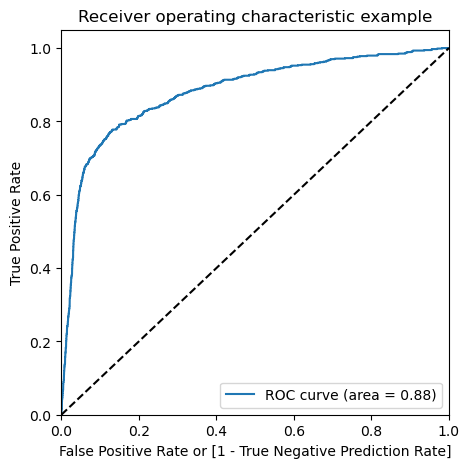

In [357]:
# ROC curve for the test dataset

# Defining the variables to plot the curve
fpr, tpr, thresholds = metrics.roc_curve(y_pred_final.churn,y_pred_final.Conv_prob, drop_intermediate = False )
# Plotting the curve for the obtained metrics
draw_roc(y_pred_final.churn,y_pred_final.Conv_prob)

In [359]:
# split the dateset into train and test datasets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)
print("Dimension of X_train:", X_train.shape)
print("Dimension of X_test:", X_test.shape)

# apply scaling on the dataset

scaler = MinMaxScaler()
X_train[num_col] = scaler.fit_transform(X_train[num_col])
X_test[num_col] = scaler.transform(X_test[num_col])

# Applying SMOTE technique for data imbalance correction

sm = SMOTE(random_state=42)
X_train_sm,y_train_sm = sm.fit_resample(X_train,y_train)
print("Dimension of X_train_sm Shape:", X_train_sm.shape)
print("Dimension of y_train_sm Shape:", y_train_sm.shape)

X_train_sm.head()

Dimension of X_train: (21000, 125)
Dimension of X_test: (9001, 125)
Dimension of X_train_sm Shape: (38576, 125)
Dimension of y_train_sm Shape: (38576,)


,mobile_number,arpu_6,arpu_7,arpu_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,av_ic_mou,av_og_mou,av_recharge_amount,av_roam_ic_mou,av_roam_og_mou,av_onnet_mou,av_offnet_mou,av_vol_2g_mb,av_night_pck_user,av_sachet_2g,av_vol_3g_mb
0,0.606402,0.176515,0.117809,0.038904,0.000269,0.000585,0.000238,0.007005,0.006330,0.015246,0.003075,0.000000,0.000980,0.000000,0.010426,0.006708,0.003471,0.004240,0.005214,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.006292,0.002472,0.000000,0.0,0.0,0.004415,0.005650,0.012348,0.014898,0.012389,0.018297,0.001078,0.003333,0.000000,0.013386,0.014004,0.024154,0.000000,0.000000,0.000000,0.001320,0.000000,0.000000,0.0,0.00000,0.0,0.001119,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.009772,0.050725,0.015306,0.018143,0.038404,0.038404,0.034615,0.038404,0.038404,0.034615,0.016393,0.055556,0.017544,0.099035,0.099035,0.099035,0.023810,0.062500,0.029412,0.0,0.000000,0.000000,0.020408,0.046735,0.037922,0.25,0.25,0.2,0.0,0.000000,0.0000,0.0,0.000000,0.0,1.0,1.0,1.0,0.564115,0.000000,0.000000,0.0,0.015388,0.004194,0.012880,0.000000,0.000000,0.000404,0.004237,0.017555,0.0,0.020833,0.000000
1,0.774973,0.183226,0.121517,0.032921,0.000566,0.000000,0.000000,0.002533,0.000000,0.000000,0.002454,0.000000,0.000000,0.000000,0.000000,0.000000,0.001624,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.013088,0.007020,0.003657,0.041620,0.021697,0.014587,0.013215,0.008694,0.000000,0.040335,0.022862,0.014662,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00209,0.0,0.000000,0.000316,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.055375,0.108696,0.040816,0.009214,0.009227,0.009227,0.008316,0.009227,0.005985,0.005619,0.114754,0.111111,0.105263,0.016077,0.016077,0.016077,0.166667,0.083333,0.176471,0.0,0.057143,0.000000,0.014445,0.031844,0.034967,0.00,0.00,0.0,0.0,0.000000,0.0000,0.0,0.057143,0.0,1.0,1.0,1.0,0.276745,0.000000,0.000000,0.0,0.024954,0.000531,0.016880,0.000000,0.000000,0.000171,0.000452,0.054605,0.0,0.177083,0.000147
2,0.375343,0.179991,0.128244,0.033826,0.001004,0.000303,0.000714,0.006148,0.016108,0.014527,0.000000,0.000529,0.000000,0.000000,0.000000,0.000

In [360]:
# import PCA
from sklearn.decomposition import PCA
pca = PCA(random_state=42)

#  PCA on training data
pca.fit(X_train_sm)

PCA(random_state=42)

In [361]:
X_train_sm_pca=pca.fit_transform(X_train_sm)
print("Dimension of X_train_sm_pca: ",X_train_sm_pca.shape)

X_test_pca=pca.transform(X_test)
print("Dimension of X_test_pca: ",X_test_pca.shape)

Dimension of X_train_sm_pca:  (38576, 125)
Dimension of X_test_pca:  (9001, 125)


In [362]:
#Viewing the PCA components
pca.components_

array([[-4.36929426e-03, -1.06252575e-02, -4.41234923e-03, ...,
         1.26889912e-02,  3.55683089e-02,  1.19201112e-02],
       [ 7.92495045e-02, -8.67337510e-04,  1.37563885e-02, ...,
         1.64838431e-03, -1.22807193e-03,  3.34867268e-03],
       [ 8.48048462e-01,  9.12518230e-03,  7.93897003e-04, ...,
        -6.41199073e-04, -1.50284109e-02,  1.43003387e-03],
       ...,
       [ 0.00000000e+00,  7.54048023e-17, -1.12588684e-16, ...,
        -8.49702991e-18,  4.63306672e-02,  2.69718280e-16],
       [ 0.00000000e+00,  2.92917501e-17,  5.19227887e-17, ...,
         1.03035173e-17,  1.31217792e-01, -9.38951779e-17],
       [-0.00000000e+00, -1.67650649e-16, -1.24853296e-16, ...,
        -3.03277557e-18, -1.35981633e-01,  3.16008832e-17]])

In [363]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg_pca = LogisticRegression()
logreg_pca.fit(X_train_sm_pca, y_train_sm)

# making the predictions
y_pred = logreg_pca.predict(X_test_pca)

# converting the prediction into a dataframe
y_pred_df = pd.DataFrame(y_pred)
print("Dimension of y_pred_df:", y_pred_df.shape)

Dimension of y_pred_df: (9001, 1)


In [364]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Checking the Confusion matrix
print("Confusion Matirx for y_test & y_pred\n",confusion_matrix(y_test,y_pred),"\n")

# Checking the Accuracy of the Predicted model.
print("Accuracy of the logistic regression model with PCA: ",accuracy_score(y_test,y_pred))

Confusion Matirx for y_test & y_pred
 [[6746 1526]
 [ 134  595]] 

Accuracy of the logistic regression model with PCA:  0.8155760471058772


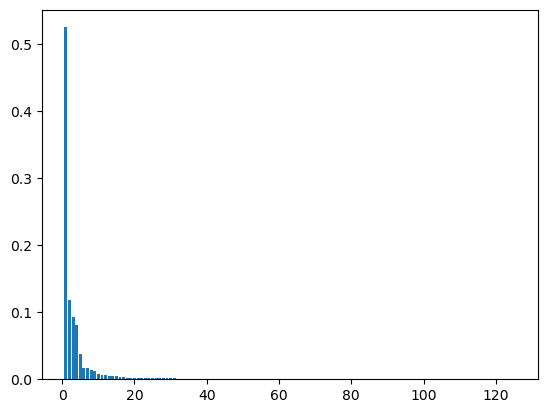

In [365]:
plt.bar(range(1,len(pca.explained_variance_ratio_)+1),pca.explained_variance_ratio_)
plt.show()

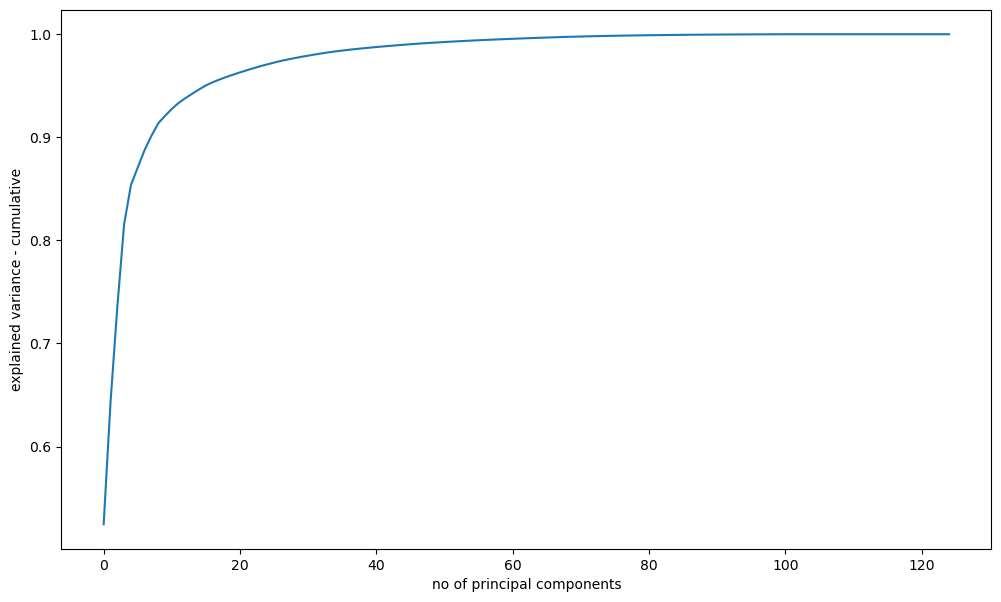

In [366]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

# Making a scree plot
fig = plt.figure(figsize=[12,7])
plt.plot(var_cumu)
plt.xlabel('no of principal components')
plt.ylabel('explained variance - cumulative')
plt.show()

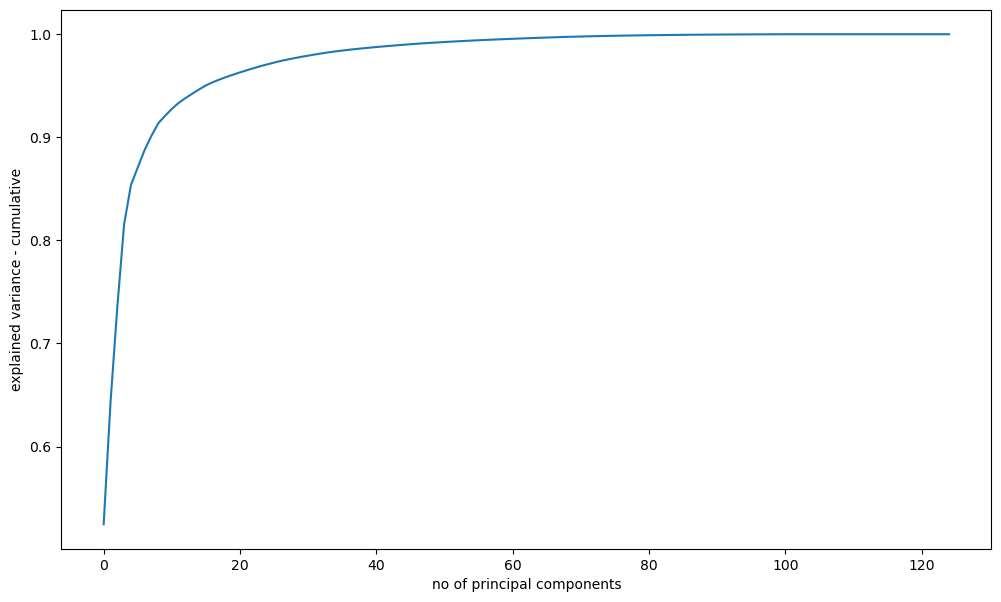

In [367]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

# Making a scree plot
fig = plt.figure(figsize=[12,7])
plt.plot(var_cumu)
plt.xlabel('no of principal components')
plt.ylabel('explained variance - cumulative')
plt.show()

In [368]:
pca_8 = PCA(n_components=15)

train_pca_8 = pca_8.fit_transform(X_train_sm)
print("Dimension for Train dataset using PCA: ", train_pca_8.shape)

test_pca_8 = pca_8.transform(X_test)
print("Dimension for Test dataset using PCA: ", test_pca_8.shape)

Dimension for Train dataset using PCA:  (38576, 15)
Dimension for Test dataset using PCA:  (9001, 15)


In [369]:
logreg_pca_8 = LogisticRegression()
logreg_pca_8.fit(train_pca_8, y_train_sm)

# making the predictions
y_pred_8 = logreg_pca_8.predict(test_pca_8)

# converting the prediction into a dataframe
y_pred_df_8 = pd.DataFrame(y_pred_8)
print("Dimension of y_pred_df_8: ", y_pred_df_8.shape)

Dimension of y_pred_df_8:  (9001, 1)


In [370]:
# Checking the Confusion matrix
print("Confusion Matirx for y_test & y_pred\n",confusion_matrix(y_test,y_pred_8),"\n")

# Checking the Accuracy of the Predicted model.
print("Accuracy of the logistic regression model with PCA: ",accuracy_score(y_test,y_pred_8))

Confusion Matirx for y_test & y_pred
 [[6201 2071]
 [ 182  547]] 

Accuracy of the logistic regression model with PCA:  0.7496944783912899
